In [7]:
import os
import numpy as np
from data.gestures import linear_accelerometer
from iotai_sensor_classification.recording import read_recordings
from iotai_sensor_classification.plot_util import column_histograms, plot_columns
from iotai_sensor_classification.recording import read_recordings
from iotai_sensor_classification.normalization import normalize_mean_std_dict

In [8]:
def gesture_recordings():
    """Read gesture recordings for all tests in file."""
    recordings_dir = os.path.dirname(linear_accelerometer.__file__)
    recordings = read_recordings(recordings_dir=recordings_dir)
    return recordings

gesture_recordings_ = gesture_recordings()
gesture_recordings_.keys()

dict_keys(['rock', 'supination', 'scoop', 'shake', 'circle'])

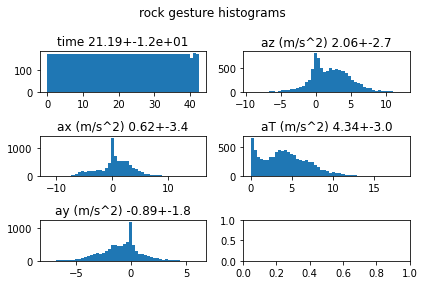

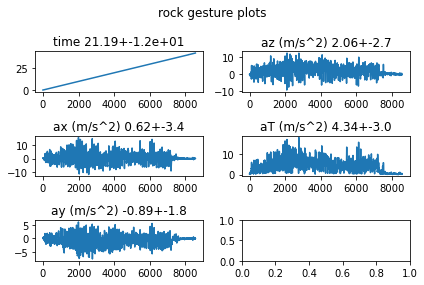

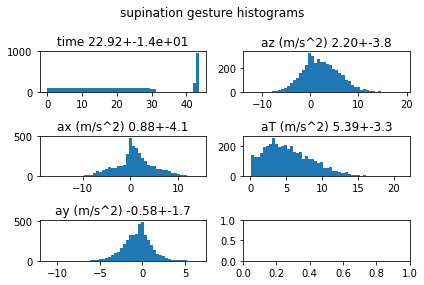

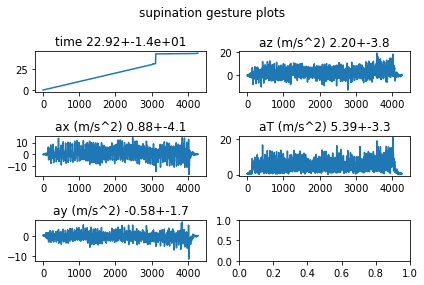

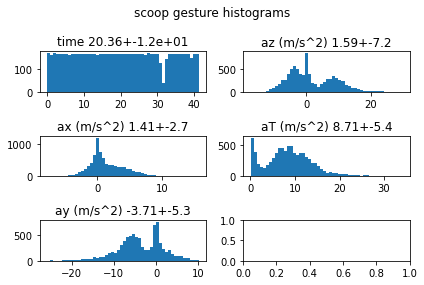

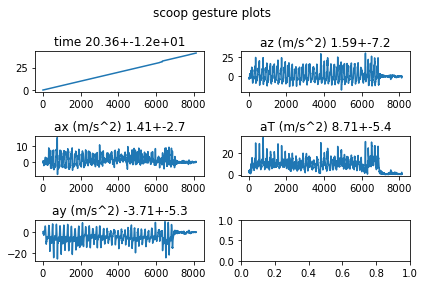

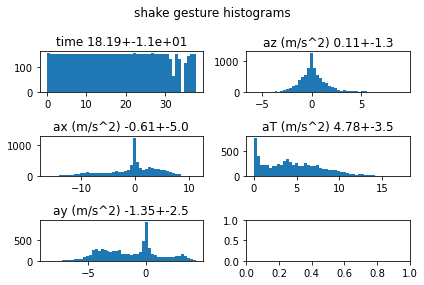

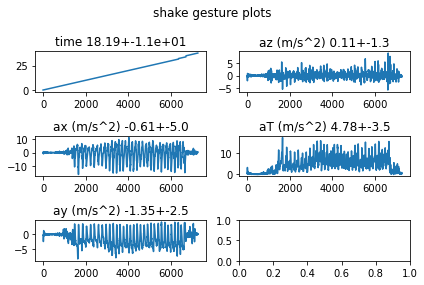

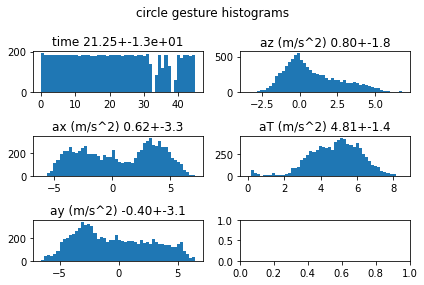

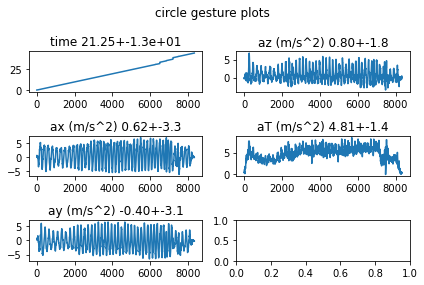

In [9]:
def test_read_gestures(gesture_recordings):
    """Test reading gesture recordings."""
    gestures = gesture_recordings.keys()
    assert "shake" in gestures
    assert "rock" in gestures
    test_output = os.path.join("test_output", "gestures", "raw")
    os.makedirs(test_output, exist_ok=True)
    for gesture in gestures:
        gesture_data = gesture_recordings[gesture]
        assert all(gesture_data["label"] == gesture)
        column_histograms(gesture_data, name=f"{gesture} gesture")
        plot_columns(gesture_data, name=f"{gesture} gesture")

test_read_gestures(gesture_recordings_)

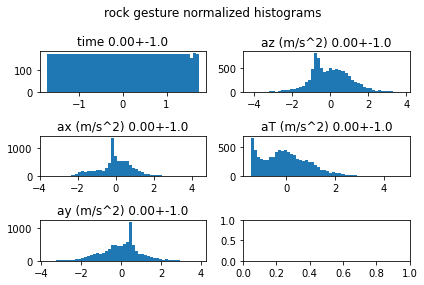

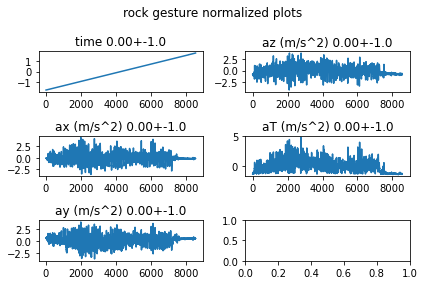

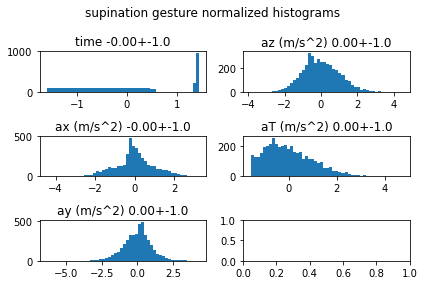

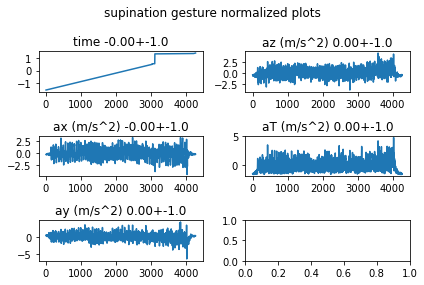

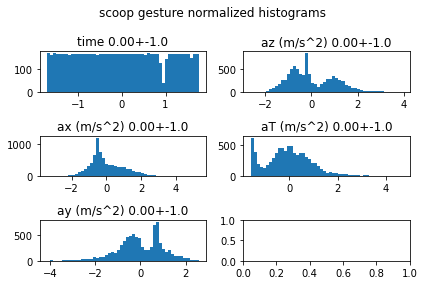

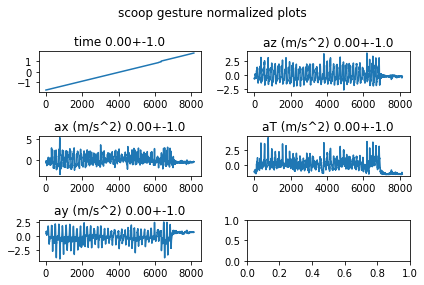

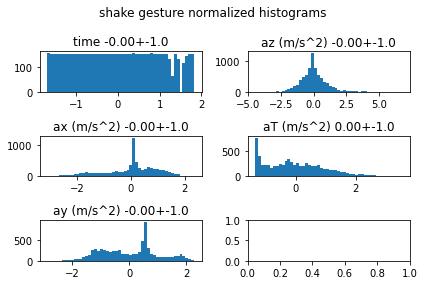

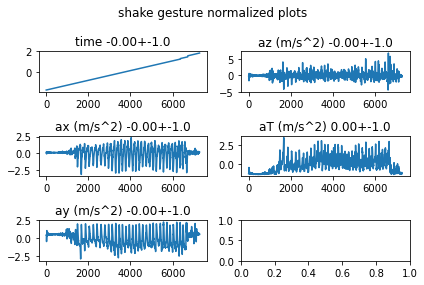

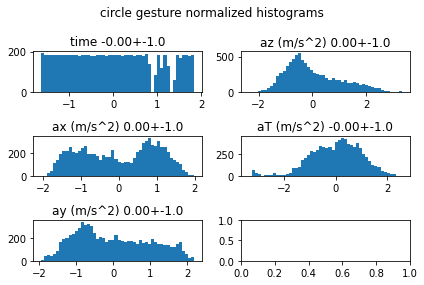

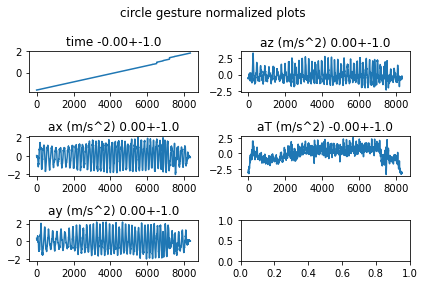

In [10]:
def test_normalize_gesture_data():
    recordings_dir = os.path.dirname(linear_accelerometer.__file__)
    raw_gestures = read_recordings(recordings_dir=recordings_dir)
    normalized_gestures = normalize_mean_std_dict(raw_gestures)
    test_output = os.path.join("test_output", "gestures", "normalized")
    os.makedirs(test_output, exist_ok=True)
    for gesture in normalized_gestures.keys():
        normalized = normalized_gestures[gesture]
        column_histograms(normalized, name=f"{gesture} gesture normalized")
        plot_columns(normalized, name=f"{gesture} gesture normalized")
        # https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
        assert np.allclose(normalized.mean(), 0.0)
        assert np.allclose(normalized.std(), 1.0)

test_normalize_gesture_data()